# Setup

In [1]:
from piper.defaults import *
import seaborn as sns

piper v0.1.0: Monday, 29 March 2021 19:09:02


# Data import

In [2]:
df = pd.read_excel('inputs/Online_store_sales.xlsx', sheet_name='Online_Retail')

head(df, 10)

46431 rows, 9 columns


,InvoiceNo,ProductCategory,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,Appliances,22728,ALARM CLOCK BAKELIKE PINK,24,2010-01-12 08:45:00,3.75,12583.0,France
1,536370,Appliances,22727,ALARM CLOCK BAKELIKE RED,24,2010-01-12 08:45:00,3.75,12583.0,France
2,536370,Appliances,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-01-12 08:45:00,3.75,12583.0,FRANCE
3,536370,Appliances,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-01-12 08:45:00,0.85,12583.0,France
4,536370,Appliances,21883,STARS GIFT TAPE,24,2010-01-12 08:45:00,0.65,12583.0,France
5,536370,Appliances,10002,INFLATABLE POLITICAL GLOBE,48,2010-01-12 08:45:00,0.85,12583.0,France
6,536370,Appliances,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-01-12 08:45:00,1.25,12583.0,France
7,536370,Appliances,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-01-12 08:45:00,2.95,12583.0,france
8,536370,Appliances,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-01-12 08:45:00,2.95,12583.0,France
9,536370,Appliances,22629,SPACEBOY LUNCH BOX,24,2010-01-12 08:45:00,1.95,12583.0,France


## meta data / overview

In [3]:
info(df)

Dataframe consumes 15.48 Mb


,columns,type,n,isna,isnull,unique
0,InvoiceNo,int64,46431,0,0,2406
1,ProductCategory,object,46431,0,0,4
2,StockCode,object,46431,0,0,2807
3,Description,object,46431,0,0,2916
4,Quantity,int64,46431,0,0,148
5,InvoiceDate,object,46431,0,0,2372
6,UnitPrice,float64,46431,0,0,206
7,CustomerID,float64,46431,1480,1480,422
8,Country,object,46431,0,0,38


## Re-sequence columns

In [4]:
cols = ['InvoiceDate', 'InvoiceNo', 'Country', 'CustomerID', 'ProductCategory',
        'StockCode', 'Description', 'Quantity', 'UnitPrice']
df = df[cols]
head(df, 10)

46431 rows, 9 columns


,InvoiceDate,InvoiceNo,Country,CustomerID,ProductCategory,StockCode,Description,Quantity,UnitPrice
0,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22728,ALARM CLOCK BAKELIKE PINK,24,3.75
1,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22727,ALARM CLOCK BAKELIKE RED,24,3.75
2,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22726,ALARM CLOCK BAKELIKE GREEN,12,3.75
3,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21724,PANDA AND BUNNIES STICKER SHEET,12,0.85
4,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21883,STARS GIFT TAPE,24,0.65
5,2010-01-12 08:45:00,536370,France,12583.0,Appliances,10002,INFLATABLE POLITICAL GLOBE,48,0.85
6,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21791,VINTAGE HEADS AND TAILS CARD GAME,24,1.25
7,2010-01-12 08:45:00,536370,france,12583.0,Appliances,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2.95
8,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2.95
9,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22629,SPACEBOY LUNCH BOX,24,1.95


## Calculate SalesValue

In [5]:
%%piper

df <- df >> assign(SalesValue=lambda x: x.Quantity * x.UnitPrice,
                  Description=lambda x: x.Description.str.title())
>> order_by(['InvoiceDate', 'InvoiceNo', 'Country', 'CustomerID', 'ProductCategory', 'StockCode'])

In [6]:
head(df, 10)

46431 rows, 10 columns


,InvoiceDate,InvoiceNo,Country,CustomerID,ProductCategory,StockCode,Description,Quantity,UnitPrice,SalesValue
11,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22631,Circus Parade Lunch Box,24,1.95,46.8
2,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22726,Alarm Clock Bakelike Green,12,3.75,45.0
5,2010-01-12 08:45:00,536370,France,12583.0,Appliances,10002,Inflatable Political Globe,48,0.85,40.8
3,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21724,Panda And Bunnies Sticker Sheet,12,0.85,10.2
13,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21731,Red Toadstool Led Night Light,24,1.65,39.6
6,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21791,Vintage Heads And Tails Card Game,24,1.25,30.0
4,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21883,Stars Gift Tape,24,0.65,15.6
15,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21913,Vintage Seaside Jigsaw Puzzles,12,3.75,45.0
8,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22326,Round Snack Boxes Set Of4 Woodland,24,2.95,70.8
18,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22492,Mini Paint Set Vintage,36,0.65,23.4


# Analysis/Cleanup

## Duplicate data/rows

In [7]:
head(df)

46431 rows, 10 columns


,InvoiceDate,InvoiceNo,Country,CustomerID,ProductCategory,StockCode,Description,Quantity,UnitPrice,SalesValue
11,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22631,Circus Parade Lunch Box,24,1.95,46.8
2,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22726,Alarm Clock Bakelike Green,12,3.75,45.0
5,2010-01-12 08:45:00,536370,France,12583.0,Appliances,10002,Inflatable Political Globe,48,0.85,40.8
3,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21724,Panda And Bunnies Sticker Sheet,12,0.85,10.2


In [8]:
%%piper 
duplicated(df, duplicates=False)
>> where("duplicate == False")
>> head()

46253 rows, 11 columns


,InvoiceDate,InvoiceNo,Country,CustomerID,ProductCategory,StockCode,Description,Quantity,UnitPrice,SalesValue,duplicate
11,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22631,Circus Parade Lunch Box,24,1.95,46.8,False
2,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22726,Alarm Clock Bakelike Green,12,3.75,45.0,False
5,2010-01-12 08:45:00,536370,France,12583.0,Appliances,10002,Inflatable Political Globe,48,0.85,40.8,False
3,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21724,Panda And Bunnies Sticker Sheet,12,0.85,10.2,False


## Quick check no unit price variances found

In [9]:
%%piper
df 
>> clean_columns()
>> str_trim()
>> group_by(['stockcode', 'description'])
>> summarise(unit_max=('unitprice', 'min'), unit_min=('unitprice', 'min'))
>> assign(variance=lambda x: x.unit_max - x.unit_min)
>> pd.DataFrame.reset_index()
>> assign(description=lambda x: x.description.str.title())
>> head(5)

2921 rows, 5 columns


,stockcode,description,unit_max,unit_min,variance
0,10002,Inflatable Political Globe,0.85,0.85,0.0
1,10120,Doggy Rubber,0.21,0.21,0.0
2,10125,Mini Funky Design Tapes,0.42,0.42,0.0
3,10133,Colouring Pencils Brown Tube,0.42,0.42,0.0
4,10135,Colouring Pencils Brown Tube,0.42,0.42,0.0


## Stockcodes linked to more than one ProductCategory

In [10]:
%%piper
df 
>> str_trim()
>> count(['stockcode', 'productcategory'], sort_values=None)
>> distinct()
>> reset_index()
>> count(['stockcode', 'productcategory'], sort_values=None)
>> reset_index()
>> duplicated(['stockcode'])
>> select('-duplicate')
>> reset_index(drop=True)

,stockcode,productcategory,n,%,cum %
0,10002,Appliances,1,0.02,0.02
1,10120,Apperals,1,0.02,0.03
2,10125,Apperals,1,0.02,0.05
3,10125,Appliances,1,0.02,0.06
4,10125,Cosmetics,1,0.02,0.08
...,...,...,...,...,...
6366,M,Appliances,1,0.02,99.91
6367,POST,Appliances,1,0.02,99.97
6368,POST,Cosmetics,1,0.02,99.98
6369,POST,Apperals,1,0.02,99.95


## ProductCategory

In [11]:
count(df, 'productcategory')

,n,%,cum %
productcategory,,,
Apperals,11648,25.09,25.09
Appliances,11607,25.00,50.09
Cosmetics,11607,25.00,75.08
House_holds,11569,24.92,100.00


In [12]:
df.loc[df.productcategory == 'House_holds', 'ProductCategory'] = 'Households'
df.loc[df.productcategory == 'Apperals', 'ProductCategory'] = 'Apparels'

In [13]:
count(df, 'productcategory')

,n,%,cum %
productcategory,,,
Apperals,11648,25.09,25.09
Appliances,11607,25.00,50.09
Cosmetics,11607,25.00,75.08
House_holds,11569,24.92,100.00


## Country

In [14]:
%piper count(df, 'country', cum_percent=True, threshold=81) >> adorn(columns='n')

,n,%,cum %
Germany,9495,20.45,20.45
France,8554,18.42,38.87
EIRE,8196,17.65,56.52
Spain,2533,5.46,61.98
Netherlands,2371,5.11,67.09
Belgium,2069,4.46,71.54
Switzerland,2002,4.31,75.85
Portugal,1519,3.27,79.13
All,36739,,


In [15]:
df.country = df.country.str.title()

In [16]:
%piper df >> count('country') >> head(5)

36 rows, 3 columns


,n,%,cum %
country,,,
Germany,9495,20.45,20.45
France,8557,18.43,38.88
Eire,8196,17.65,56.53
Spain,2533,5.46,61.99
Netherlands,2371,5.11,67.09


## StockCode

In [17]:
%piper count(df, 'stockcode') >> head(5)

2807 rows, 3 columns


,n,%,cum %
stockcode,,,
POST,1112,2.39,2.39
22423,341,0.73,3.13
22326,317,0.68,3.81
22554,225,0.48,4.30
22556,210,0.45,4.75


## InvoiceNo

In [18]:
%piper df >> count('invoiceno') >> head()

2406 rows, 3 columns


,n,%,cum %
invoiceno,,,
570672,259,0.56,0.56
562046,219,0.47,1.03
569866,182,0.39,1.42
563613,171,0.37,1.79


## InvoiceDate

In [19]:
count(df, 'invoicedate')

,n,%,cum %
invoicedate,,,
2011-11-10 14:52:00,259,0.56,0.56
2011-02-08 10:34:00,219,0.47,1.03
2011-06-10 14:50:00,182,0.39,1.42
18-08-2011 08:49,171,0.37,1.79
2011-07-01 12:28:00,149,0.32,2.11
...,...,...,...
19-08-2011 10:37,1,0.00,99.99
23-06-2011 13:16,1,0.00,99.99
2011-11-11 14:04:00,1,0.00,100.00


In [20]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

In [21]:
count(df, 'invoicedate')

,n,%,cum %
invoicedate,,,
2011-11-10 14:52:00,259,0.56,0.56
2011-02-08 10:34:00,219,0.47,1.03
2011-06-10 14:50:00,182,0.39,1.42
2011-08-18 08:49:00,171,0.37,1.79
2011-07-01 12:28:00,149,0.32,2.11
...,...,...,...
2011-04-05 16:18:00,1,0.00,99.99
2011-04-05 10:47:00,1,0.00,99.99
2011-04-05 08:52:00,1,0.00,100.00


## CustomerID

In [22]:
count(df, 'customerid')

,n,%,cum %
customerid,,,
14911.0,5903.0,12.71,12.71
14646.0,2085.0,4.49,17.20
NaN,1480.0,3.19,20.39
14156.0,1420.0,3.06,23.45
12415.0,778.0,1.68,25.13
...,...,...,...
12814.0,2.0,0.00,99.99
12666.0,2.0,0.00,99.99
17443.0,1.0,0.00,100.00


In [23]:
df.customerid = df.customerid.fillna(0).astype(int)
count(df, 'customerid')

,n,%,cum %
customerid,,,
14911,5903,13.13,13.13
14646,2085,4.64,17.77
14156,1420,3.16,20.93
12415,778,1.73,22.66
12681,646,1.44,24.10
...,...,...,...
12814,2,0.00,99.99
12505,1,0.00,100.00
17443,1,0.00,100.00


## Quantity

In [24]:
count(df, 'quantity')

,n,%,cum %
quantity,,,
12,10628,22.89,22.89
6,5672,12.22,35.11
24,4162,8.96,44.07
4,3613,7.78,51.85
2,3356,7.23,59.08
...,...,...,...
117,1,0.00,99.99
140,1,0.00,99.99
156,1,0.00,100.00


### Negative Quantity

In [25]:
%%piper
df >> where("quantity < 0") >> head(10)

1432 rows, 11 columns


,invoicedate,invoiceno,country,customerid,productcategory,stockcode,description,quantity,unitprice,salesvalue,ProductCategory
147,2010-01-12 14:33:00,536548,Germany,12472,Appliances,20914,Set/5 Red Retrospot Lid Glass Bowls,-1,2.95,-2.95,NaN
157,2010-01-12 14:33:00,536548,Germany,12472,Appliances,20957,Porcelain Hanging Bell Small,-1,1.45,-1.45,NaN
156,2010-01-12 14:33:00,536548,Germany,12472,Appliances,21218,Red Spotty Biscuit Tin,-3,3.75,-11.25,NaN
153,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22077,6 Ribbons Rustic Charm,-6,1.65,-9.90,NaN
155,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22168,Organiser Wood Antique White,-2,8.50,-17.00,NaN
146,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22242,5 Hook Hanger Magic Toadstool,-5,1.65,-8.25,NaN
145,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22244,3 Hook Hanger Magic Garden,-4,1.95,-7.80,NaN
152,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22245,"Hook, 1 Hanger ,Magic Garden",-2,0.85,-1.70,NaN
151,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22333,Retrospot Party Bag + Sticker Set,-1,1.65,-1.65,NaN
158,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22580,Advent Calendar Gingham Sack,-4,5.95,-23.80,NaN


## Export of cleaned dataframe

In [26]:
%%piper 
df >> to_excel(file_name='outputs/testing')

Workbook: outputs/20210329_testing.xlsx


<< mult-sheet mode >>


Sheet (range): sheet1 ($A$1:$K$46432)


/home/mike/Documents/venv/jupyter/lib/python3.8/site-packages/xlsxwriter/worksheet.py:2706: UserWarning: Duplicate header name in add_table(): 'productcategory'
  warn("Duplicate header name in add_table(): '%s'"


Completed.


# Questions

## Duplicate CustomerIDs ? Not unique across Countries

In [27]:
%%piper
df 
>> distinct(['country', 'customerid'])
>> group_by(['customerid', 'country']) 
>> summarise(n=('invoiceno', 'count'))
>> reset_index()
>> duplicated('customerid', )
>> select('-duplicate')

,customerid,country,n
0,0,Bahrain,1
1,0,Eire,1
2,0,France,1
3,0,Hong Kong,1
4,0,Israel,1
...,...,...,...
433,17444,Canada,1
434,17508,Greece,1
435,17828,Malta,1
436,17829,United Arab Emirates,1


## How many invoices per country?

In [28]:
%%piper
gx <- df 
>> distinct(['country', 'invoiceno', 'productcategory'])
>> group_by(['country', 'productcategory']) 
>> summarise(count_of_invoices=('invoiceno', 'count'))
>> order_by('count_of_invoices', ascending=False)
>> reset_index()

In [29]:
head(gx,10)

115 rows, 3 columns


,country,productcategory,count_of_invoices
0,Germany,Appliances,162
1,Germany,Apperals,159
2,Germany,House_holds,152
3,Germany,Cosmetics,130
4,France,Appliances,125
5,France,Apperals,124
6,France,House_holds,114
7,France,Cosmetics,98
8,Eire,Cosmetics,96
9,Eire,House_holds,95


In [30]:
%piper gx >> where("count_of_invoices > 100") >> head()

7 rows, 3 columns


,country,productcategory,count_of_invoices
0,Germany,Appliances,162
1,Germany,Apperals,159
2,Germany,House_holds,152
3,Germany,Cosmetics,130


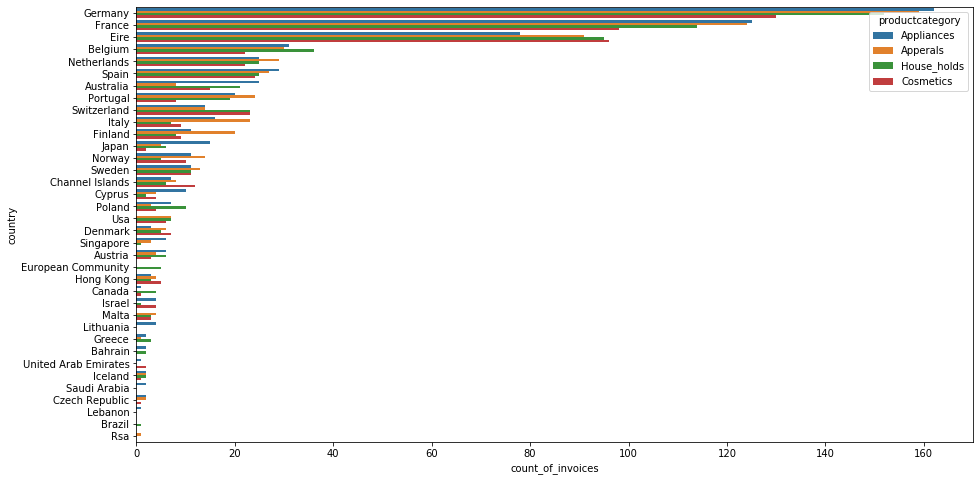

In [31]:

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=gx, y='country', x='count_of_invoices', hue='productcategory')

## Quantity vs UnitPrice

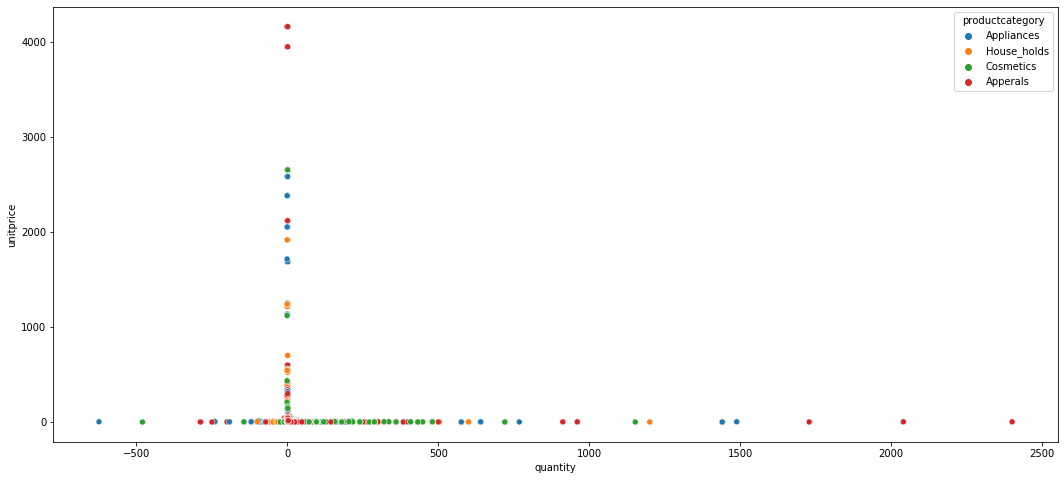

In [32]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.scatterplot(data=df, x='quantity', y='unitprice', hue='productcategory')

## Sales by Invoice Date

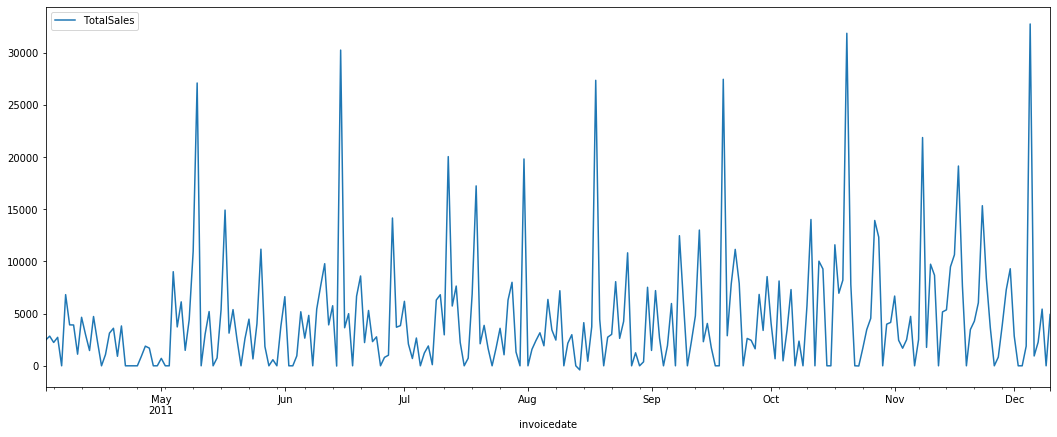

In [33]:
%%piper 
df 
>> group_by(['invoicedate'])
>> summarise(TotalSales=('salesvalue', 'sum'))
>> where("invoicedate > '2011-04-01'").plot(figsize=(18,7))

## Sales by Country, ProductCategory, Invoice Date

In [34]:
%%piper 

gx <- df 
>> group_by(['country', 'productcategory', 'invoicedate']) 
>> summarise(totalsales=('salesvalue', 'sum'))
>> where("invoicedate >= '2011-11' 
         and totalsales.between(0, 100)")
>> reset_index()
>> assign(totalsales=lambda x: x.totalsales.round(2))

In [35]:
head(gx, 6)

6 rows, 4 columns


,country,productcategory,invoicedate,totalsales
0,Eire,Appliances,2011-11-03,0.00
1,Hong Kong,Apperals,2011-11-14,0.00
2,Norway,Cosmetics,2011-11-10,6.00
3,Portugal,Apperals,2011-11-17,58.35
4,Portugal,Apperals,2011-11-30,56.00
5,Sweden,House_holds,2011-11-05,8.50


In [36]:
%%piper 

gx <- df 
>> group_by(['country', 'productcategory', 'invoicedate']) 
>> summarise(totalsales=('salesvalue', 'mean'))
>> where("invoicedate >= '2011-11' and totalsales.between(0, 100) ")
>> reset_index()
>> assign(totalsales=lambda x: x.totalsales.round(2))

In [37]:
head(gx, 6)

160 rows, 4 columns


,country,productcategory,invoicedate,totalsales
0,Australia,Apperals,2011-11-24,35.80
1,Australia,Appliances,2011-11-01,24.34
2,Australia,Cosmetics,2011-12-08,60.88
3,Australia,House_holds,2011-12-05,20.66
4,Austria,Apperals,2011-11-13,15.86
5,Austria,Apperals,2011-11-14,22.51


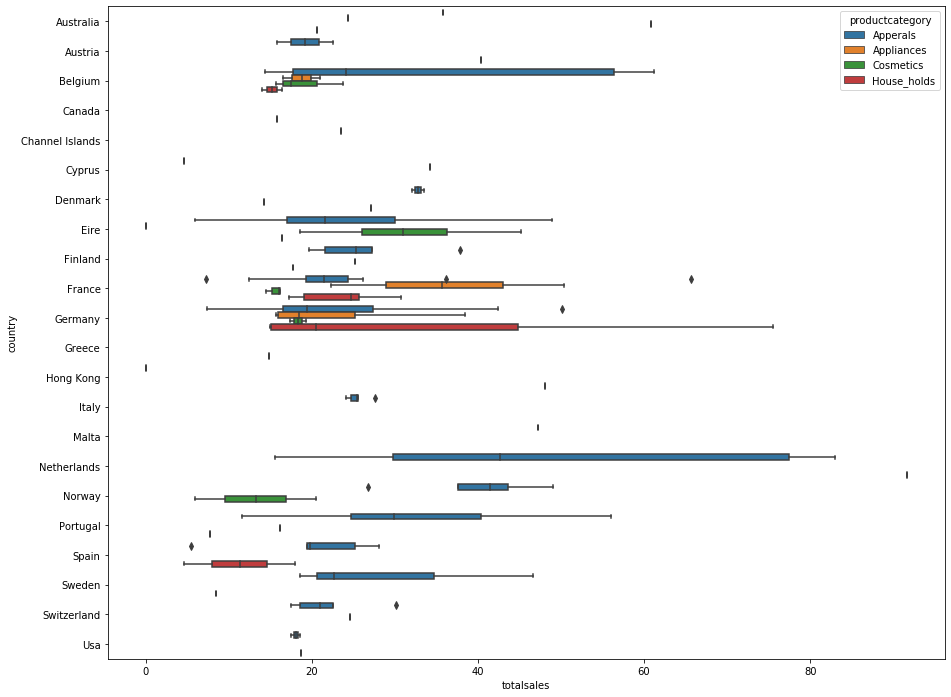

In [38]:
fig, ax = plt.subplots(figsize=(15,12))
sns.boxplot(data=gx, y='country', x='totalsales', hue='productcategory')